<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Tipología y ciclo de la vida de los datos</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Practica 2: Limpieza y validación de los datos
Autores: 
*   Adrián García Rodriguez
*   Tomás Jesús Luna López



#1. Descripción del proyecto

En los últimos años hemos visto gestas deportivas que podían parecer imprevisibles, cómo por ejemplo la consecución del título de la Premier Ligue por parte del Leicester C.F., o el título de la NBA de los Toronto Raptors, un equipo que no hace tanto era el peor de su división.

Además, en los últimos tiempos han proliferado las casas de apuestas, y aunque no nos posicionamos a favor de las apuestas y sabemos el gran problema que supone la ludopatía, ¿seríamos capaces de predecir los resultados mejor que las casas de apuestas y ganarles en su propio juego?

Supongamos que queremos ser capaces de ajustar un modelo para predecir resultados deportivos, y si el modelo es lo suficientemente preciso, realizar apuestas deportivas en función de las recomendaciones del sistema. Aunque para esto podríamos elegir muchas disciplinas deportivas como el baloncesto o el tenis, para nuestro caso hemos elegido el futbol, concretamente La Liga española.

Para ello, suponemos que los jugadores disponibles de cada equipo, así como su desempeño a lo largo de la temporada, pueden ayudarnos en esta tarea. Por ejemplo, para dos equipos de calidad similar, si un equipo tiene disponibles jugadores que han estado jugando muy bien y el otro equipo tiene jugadores con mala racha de partidos, el modelo debería predecir que ganará el primero.

 El objetivo final (no se incluye en esta práctica) sería tener un resultado estimado para cada partido (victoria local, empate, o derrota local), con una probabilidad para cada resultado. Posteriormente compararíamos nuestras probabilidades con las cuotas ofertadas por las casas de apuestas, y en caso de que en los testeos el modelo hubiese resultado robusto, apostaríamos en las apuestas que tuvieran más esperanza matemática.

# 2 Descripción del dataset
El segundo dataset muestra el detalle de cada partido disputado por los diferentes jugadores que han participado en la actual edición de LaLiga. Este dataset está dividido en siete secciones.

*  Datos del partido. Fecha en la que se disputo el partido, día de la semana, si el partido se jugo en casa o como visitante, el resultado, equipo rival, minutos disputados y la/s posición/es que ha jugado dicho jugador en el encuentro.
*  Datos de rendimiento. Muestra las estadísticas generales del partido como son, los goles anotados, asistencias, penaltis, disparos, disparos a puerta, tarjetas recibidas, toques al balón, número de veces que acudió a la presión, entradas e intercepciones. 
*  Expectativa. Datos que muestras los goles y asistencias que se esperan del jugador en el partido teniendo en cuenta los datos anteriores.
*  Acciones. Datos que representan la cantidad de acciones de peligro que generó el jugador en dicho encuentro.
*  Pases. Muestra los datos de la cantidad de pases realizados, el porcentaje de pases completados, la cantidad de pases progresiones y la cantidad de intercepciones realizadas.
*  Transportes. Estos datos hacen referencia a la cantidad de veces que el jugador ha realizado conducciones y cuantas de ellas han sido en zona peligrosa.
*  Dribles. Por último, tenemos los datos que hacen referencia a la cantidad de intento de regates realizados por el jugador y en cuantos de ellos ha salido victorioso.


## 2.1. Carga del conjunto de datos

Ejecutamos pycodestyle_magic para cumplir la convención pep8 

In [2]:
pip install pycodestyle pycodestyle_magic flake8

  Using cached pycodestyle_magic-0.5-py2.py3-none-any.whl (9.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext pycodestyle_magic

In [2]:
%pycodestyle_on

In [4]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import os

In [14]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [7]:
import os
work_dir = os.path.abspath(os.getcwd())

In [12]:
data = pd.read_csv(
    work_dir + "/Documents/GitHub/Tipologia_prac1/players_info.csv",
    sep=";", quotechar="'")
data.head()

,equipo,jugador,date,dayofweek,comp,round,venue,result,squad,opponent,...,passes_completed,passes,passes_pct,progressive_passes,carries,progressive_carries,dribbles_completed,dribbles,match_report,Unnamed: 40
0,Alavés,Luis Rioja,2021-08-14,Sáb,La Liga,Semana 1 de partido,Local,D 1–4,Alavés,Real Madrid,...,12.0,16.0,75.0,0.0,20.0,4.0,1.0,1.0,Informe del partido,NaN
1,Alavés,Luis Rioja,2021-08-21,Sáb,La Liga,Semana 2 de partido,Local,D 0–1,Alavés,Mallorca,...,12.0,25.0,48.0,0.0,27.0,8.0,2.0,3.0,Informe del partido,NaN
2,Alavés,Luis Rioja,2021-08-27,Vie,La Liga,Semana 3 de partido,Visitante,D 0–3,Alavés,Valencia,...,15.0,22.0,68.2,2.0,22.0,4.0,2.0,4.0,Informe del partido,NaN
3,Alavés,Luis Rioja,2021-09-18,Sáb,La Liga,Semana 5 de partido,Local,D 0–2,Alavés,Osasuna,...,19.0,37.0,51.4,1.0,36.0,3.0,2.0,6.0,Informe del partido,NaN
4,Alavés,Luis Rioja,2021-09-22,Mié,La Liga,Semana 6 de partido,Visitante,D 0–1,Alavés,Espanyol,...,30.0,42.0,71.4,1.0,41.0,12.0,3.0,4.0,Informe del partido,NaN


## 2.3. Exploración del Dataset

In [13]:
print("Disponemos de {} variables con un total de {} muestras\nLos nombres de las variables son: {}"
      .format(len(data.columns), len(data), data.columns))
data.describe()

Disponemos de 41 variables con un total de 20460 muestras
Los nombres de las variables son: Index(['equipo', 'jugador', 'date', 'dayofweek', 'comp', 'round', 'venue',
       'result', 'squad', 'opponent', 'game_started', 'position', 'minutes',
       'goals', 'assists', 'pens_made', 'pens_att', 'shots_total',
       'shots_on_target', 'cards_yellow', 'cards_red', 'touches', 'pressures',
       'tackles', 'interceptions', 'blocks', 'xg', 'npxg', 'xa', 'sca', 'gca',
       'passes_completed', 'passes', 'passes_pct', 'progressive_passes',
       'carries', 'progressive_carries', 'dribbles_completed', 'dribbles',
       'match_report', 'Unnamed: 40'],
      dtype='object')


,minutes,goals,assists,pens_made,pens_att,shots_total,shots_on_target,cards_yellow,cards_red,touches,...,gca,passes_completed,passes,passes_pct,progressive_passes,carries,progressive_carries,dribbles_completed,dribbles,Unnamed: 40
count,13639.000000,13661.000000,13627.000000,13661.000000,13661.000000,13320.000000,13320.000000,13661.000000,13661.000000,10415.000000,...,10415.000000,10415.000000,10415.000000,10313.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,0.0
mean,64.447174,0.090916,0.059661,0.009443,0.012005,0.802703,0.265541,0.155040,0.007906,37.713010,...,0.128757,23.976476,30.346135,75.760070,1.937302,23.419683,2.495727,0.540663,0.998656,NaN
std,30.928286,0.325703,0.254491,0.101158,0.113519,1.169523,0.597174,0.370946,0.088565,24.038665,...,0.395424,19.079643,21.709858,16.370852,2.301586,17.132737,2.942826,0.970396,1.510922,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,...,0.000000,9.000000,13.000000,66.700000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN
50%,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,...,0.000000,20.000000,27.000000,78.300000,1.000000,20.000000,2.000000,0.000000,0.000000,NaN
75%,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,53.500000,...,0.000000,34.000000,43.000000,86.700000,3.000000,33.000000,4.000000,1.000000,1.000000,NaN
max,120.000000,4.000000,2.000000,2.000000,2.000000,10.000000,6.000000,2.000000,1.000000,161.000000,...,4.000000,143.000000,150.000000,100.000000,22.000000,133.000000,32.000000,10.000000,17.000000,NaN


1:80: E501 line too long (100 > 79 characters)


#3. Limpieza de los datos

##3.1 Tipos de datos

In [14]:
data.dtypes

equipo                  object
jugador                 object
date                    object
dayofweek               object
comp                    object
round                   object
venue                   object
result                  object
squad                   object
opponent                object
game_started            object
position                object
minutes                float64
goals                  float64
assists                float64
pens_made              float64
pens_att               float64
shots_total            float64
shots_on_target        float64
cards_yellow           float64
cards_red              float64
touches                float64
pressures              float64
tackles                float64
interceptions          float64
blocks                 float64
xg                     float64
npxg                   float64
xa                     float64
sca                    float64
gca                    float64
passes_completed       float64
passes  

Vemos que varios tipos de datos estan mal seteados, asi que procedemos a modificarlo.

In [15]:
change_columns = ['date']
for col in change_columns:
    data[col] = pd.to_datetime(data[col])

## 3.2 Valores vácios

In [16]:
data.isna().sum()

equipo                     0
jugador                    0
date                    1455
dayofweek               1455
comp                    1455
round                   1455
venue                   1455
result                  1455
squad                   1455
opponent                1455
game_started            1455
position                7772
minutes                 6821
goals                   6799
assists                 6833
pens_made               6799
pens_att                6799
shots_total             7140
shots_on_target         7140
cards_yellow            6799
cards_red               6799
touches                10045
pressures              10045
tackles                10045
interceptions           7140
blocks                 10045
xg                     10045
npxg                   10045
xa                     10045
sca                    10045
gca                    10045
passes_completed       10045
passes                 10045
passes_pct             10147
progressive_pa

Vemos que se ha producido un error al cargar el CSV y se ha generado una columna extra, 'Unname:40', así que procedemos a eliminarla. También eliminamos la columna 'match_report', que es un dato extraido de más.


In [17]:
data = data.drop(['Unnamed: 40', 'match_report'], axis=1)

Por otro lado, podemos observar que hay mucho valores vacios en los siguientes campos:


*   <b>Date</b>. Estas filas estan compltamente vacías, con lo que procedemos a eliminarlas
*   <b>Position</b>. Estos valores corresponden a dos grupos, si el jugador a participado en el encuentro pero en una posicion no soportado en lo datos, mientras que si el jugador no ha disputado ningun minuto, al no haber participado en el encuentro, su posicion está vacía. Para el primer caso, vamos completar el campo con el valor UNK, para indica que es deconocida, mientras que en el segundo caso lo compltaremos con null.
*    El resto de valores son de estadisticas que el jugador no ha podido completar por diferentes motivos (poco tiempo de juego, por posicion, ...), estos valores se van a sustituir por 0 para facilitar las estadisticas posteriores.



In [18]:
data.loc[(data['position'].isna()) & ~(data['minutes'].isna()), 'position']
# borrado de las filas vacias
data = data.drop(data.index[data['date'].isna()])
data.loc[data['position'].isna() & ~data['minutes'].isna(), 'position'] = 'UNK'
data.loc[data['position'].isna(), 'position'] = None
data.loc[data['goals'].isna() & ~data['minutes'].isna(), 'goals'] = 0
data.loc[data['assists'].isna() & ~data['minutes'].isna(), 'assists'] = 0
data.loc[data['pens_made'].isna() & ~data['minutes'].isna(), 'pens_made'] = 0
data.loc[data['pens_att'].isna() & ~data['minutes'].isna(), 'pens_att'] = 0
data.loc[data['shots_total'].isna() & ~data['minutes'].isna(), 'shots_total'] = 0
data.loc[data['shots_on_target'].isna() & ~data['minutes'].isna(), 'shots_on_target'] = 0
data.loc[data['cards_yellow'].isna() & ~data['minutes'].isna(), 'cards_yellow'] = 0
data.loc[data['cards_red'].isna() & ~data['minutes'].isna(), 'cards_red'] = 0
data.loc[data['touches'].isna() & ~data['minutes'].isna(), 'touches'] = 0
data.loc[data['pressures'].isna() & ~data['minutes'].isna(), 'pressures'] = 0
data.loc[data['tackles'].isna() & ~data['minutes'].isna(), 'tackles'] = 0
data.loc[data['interceptions'].isna() & ~data['minutes'].isna(), 'interceptions'] = 0
data.loc[data['blocks'].isna() & ~data['minutes'].isna(), 'blocks'] = 0
data.loc[data['xg'].isna() & ~data['minutes'].isna(), 'xg'] = 0
data.loc[data['npxg'].isna() & ~data['minutes'].isna(), 'npxg'] = 0
data.loc[data['xa'].isna() & ~data['minutes'].isna(), 'xa'] = 0
data.loc[data['sca'].isna() & ~data['minutes'].isna(), 'sca'] = 0
data.loc[data['gca'].isna() & ~data['minutes'].isna(), 'gca'] = 0
data.loc[data['passes_completed'].isna() & ~data['minutes'].isna(), 'passes_completed'] = 0
data.loc[data['passes'].isna() & ~data['minutes'].isna(), 'passes'] = 0
data.loc[data['passes_pct'].isna() & ~data['minutes'].isna(), 'passes_pct'] = 0
data.loc[data['progressive_passes'].isna() & ~data['minutes'].isna(), 'progressive_passes'] = 0
data.loc[data['carries'].isna() & ~data['minutes'].isna(), 'carries'] = 0
data.loc[data['progressive_carries'].isna() & ~data['minutes'].isna(), 'progressive_carries'] = 0
data.loc[data['dribbles_completed'].isna() & ~data['minutes'].isna(), 'dribbles_completed'] = 0
data.loc[data['dribbles'].isna() & ~data['minutes'].isna(), 'dribbles'] = 0

10:80: E501 line too long (81 > 79 characters)
11:80: E501 line too long (89 > 79 characters)
12:80: E501 line too long (83 > 79 characters)
17:80: E501 line too long (85 > 79 characters)
24:80: E501 line too long (91 > 79 characters)
27:80: E501 line too long (95 > 79 characters)
29:80: E501 line too long (97 > 79 characters)
30:80: E501 line too long (95 > 79 characters)


## 3.3 Valores átipicos
En este paso, para todas las variables númericas, vamos a buscar valores átipicos o extremos.

C:\Users\tomas\AppData\Local\Temp\ipykernel_1340\1557634887.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(4, 4), sharey=True)


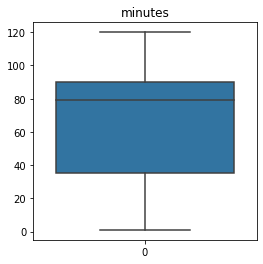

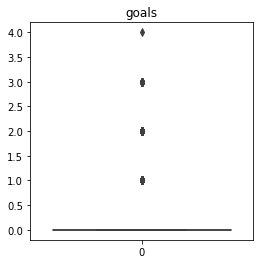

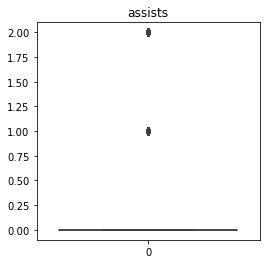

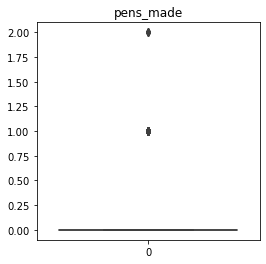

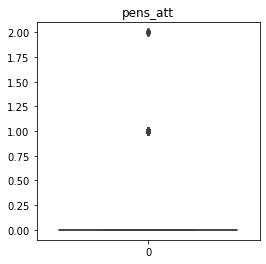

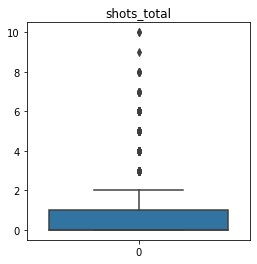

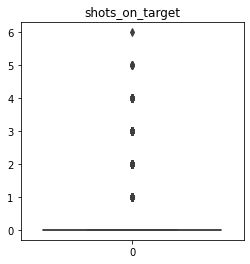

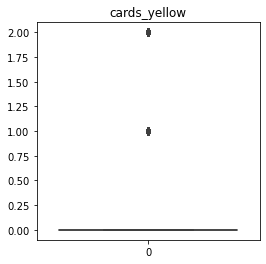

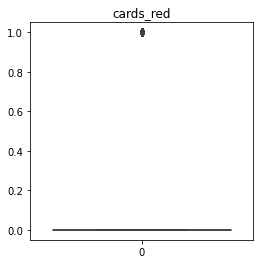

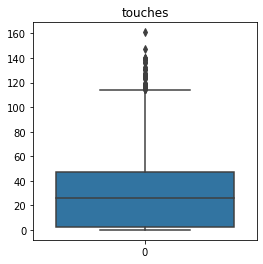

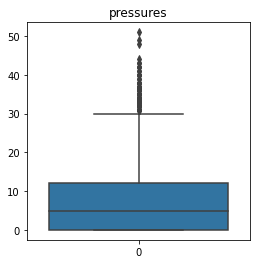

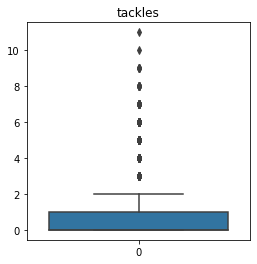

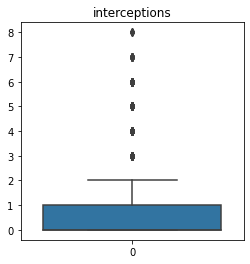

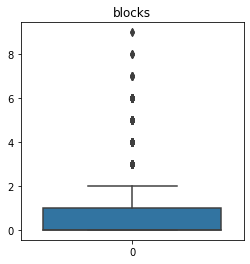

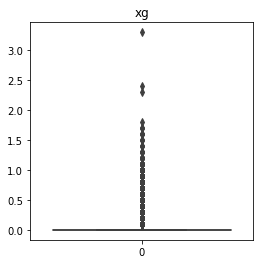

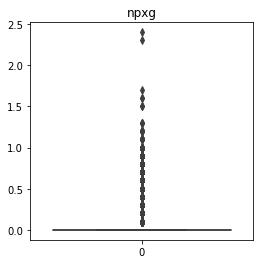

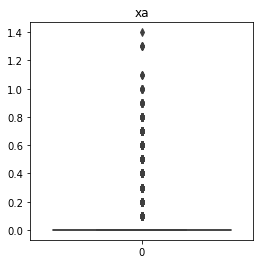

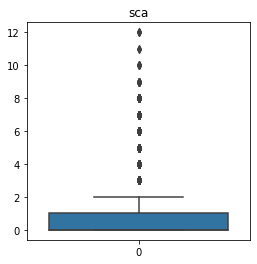

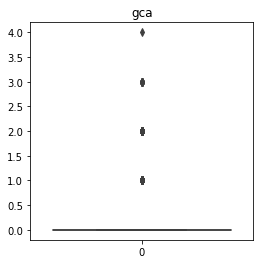

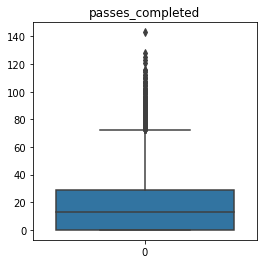

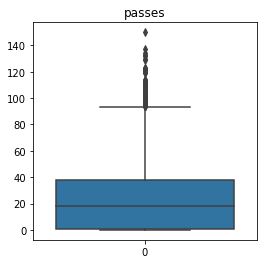

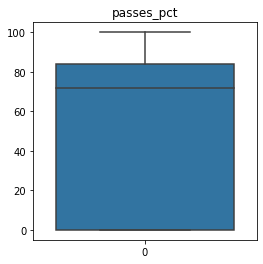

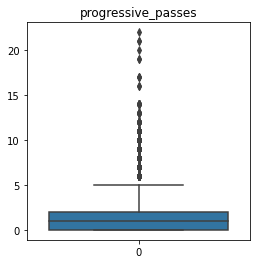

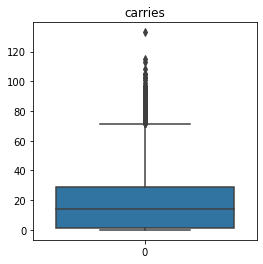

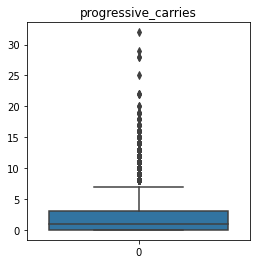

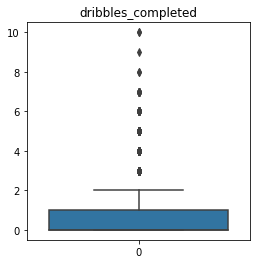

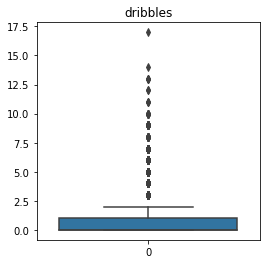

2:80: E501 line too long (162 > 79 characters)
2:163: W291 trailing whitespace
3:80: E501 line too long (203 > 79 characters)
5:3: E111 indentation is not a multiple of four
6:3: E111 indentation is not a multiple of four
7:3: E111 indentation is not a multiple of four


In [19]:
# sns.boxplot(data['minutes'])
names = ['minutes', 'goals', 'assists', 'pens_made', 'pens_att', 'shots_total', 'shots_on_target', 'cards_yellow', 'cards_red', 'touches', 'pressures', 'tackles', 
         'interceptions', 'blocks', 'xg', 'npxg', 'xa', 'sca', 'gca', 'passes_completed', 'passes', 'passes_pct', 'progressive_passes', 'carries', 'progressive_carries', 'dribbles_completed', 'dribbles']
for i in range(len(names)):
  fig, ax = plt.subplots(1, figsize=(4, 4), sharey=True)
  sns.boxplot(ax=ax, data=data[names[i]])
  ax.set_title(names[i])

En muchos campos vemos varios valores atípicos, pero analizando los datos, son valores que entran dentro de los posible, por eso se decide mantener dichos datos.

# 4. Análisis de los datos

Hacemos histogramas de los datos para entender mejor las distribuciones de las distintas variables

C:\Users\tomas\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


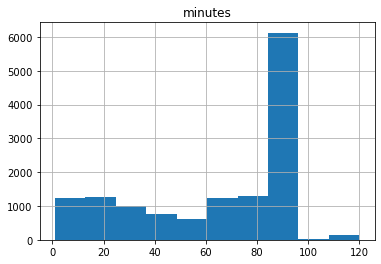

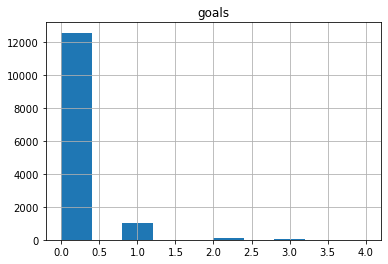

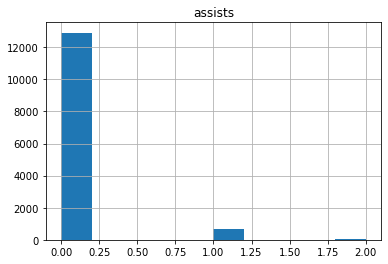

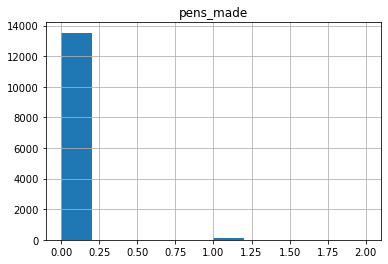

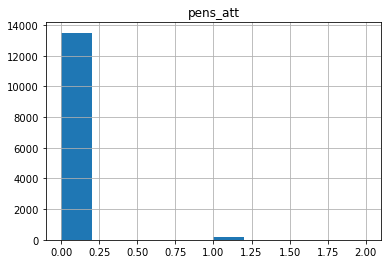

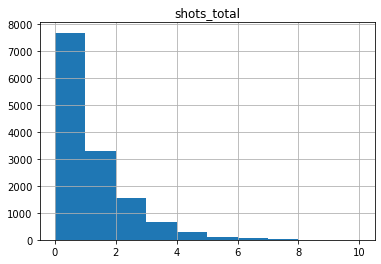

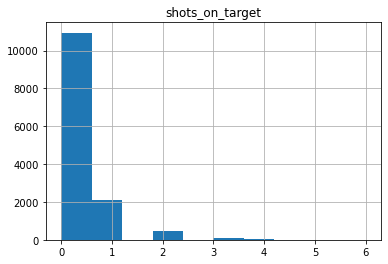

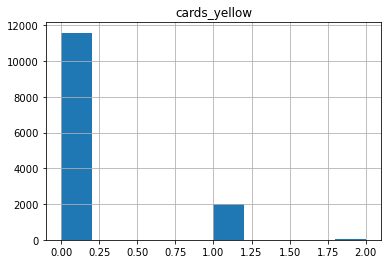

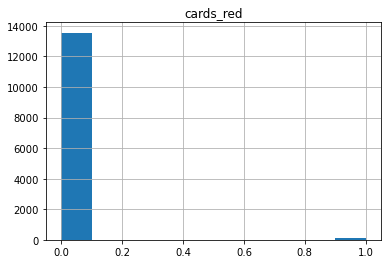

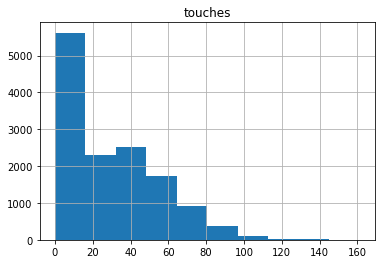

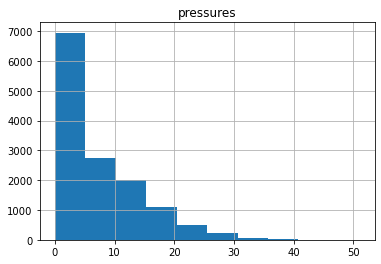

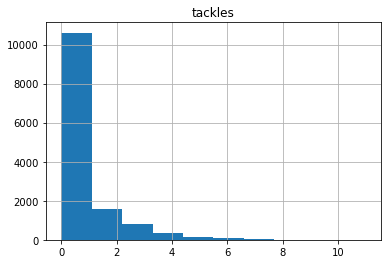

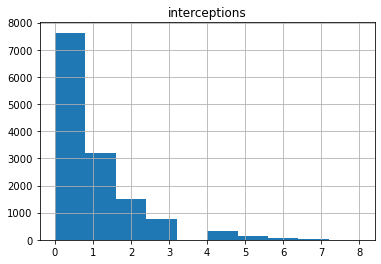

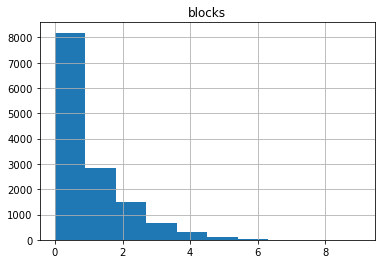

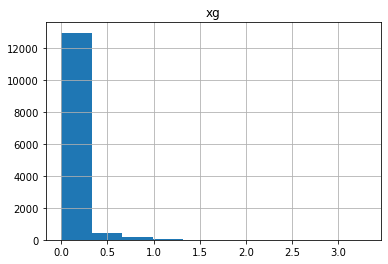

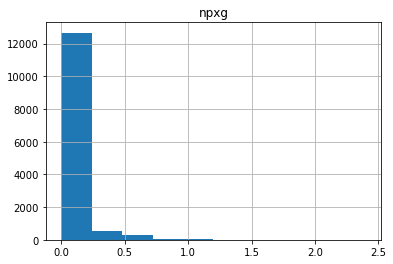

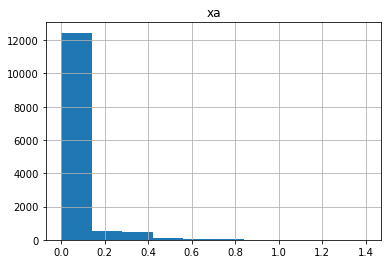

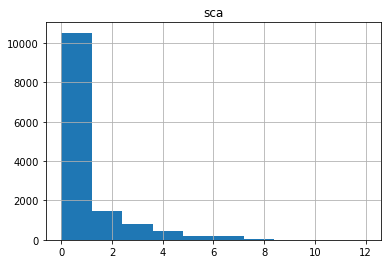

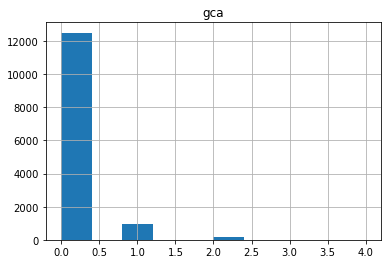

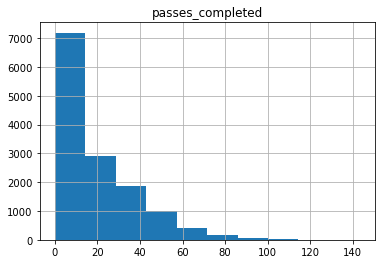

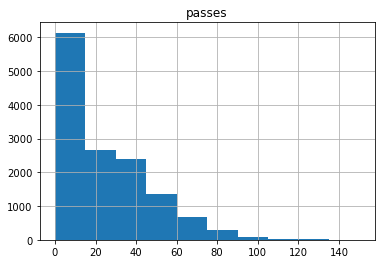

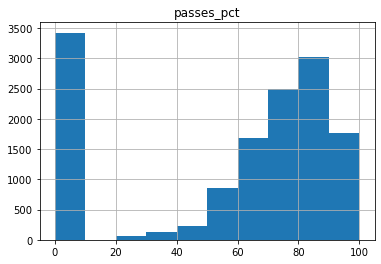

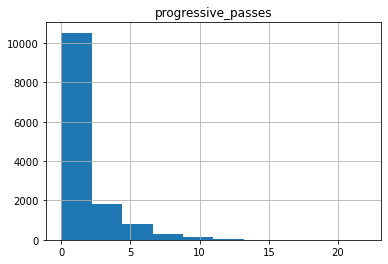

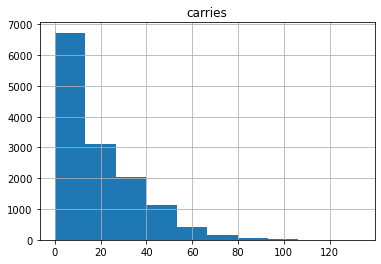

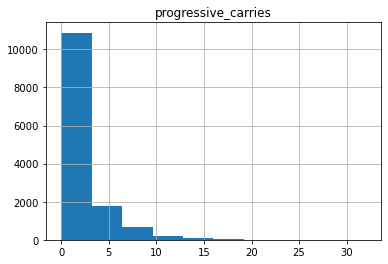

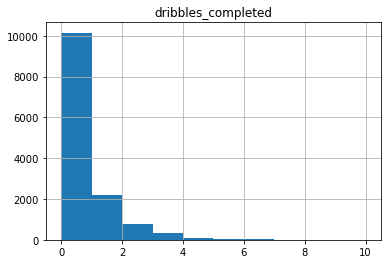

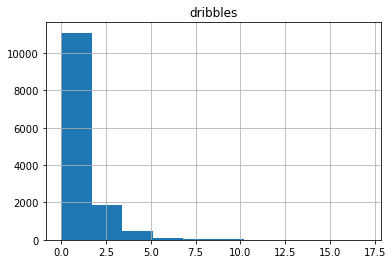

In [20]:
for name in names:
    data.hist(column=name)

In [54]:
data_liga = data[data['comp'] == 'La Liga']

In [55]:
result_split = data_liga['result'].str.split(' ', expand=True)

In [56]:
# resultado sólo cogiendo si gana, empata o pierde
data_liga['result_wdl'] = result_split.loc[:, 0]

C:\Users\tomas\AppData\Local\Temp\ipykernel_1340\638886744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liga['result_wdl'] = result_split.loc[:, 0]


In [57]:
goals_split = result_split.loc[:, 1].str.split('–', expand=True)

In [68]:
data_liga['goals_team'] = goals_split.loc[:, 0]
data_liga['goals_rival'] = goals_split.loc[:, 1]

data_liga['goals_team'] = data_liga['goals_team'].astype(int)
data_liga['goals_rival'] = data_liga['goals_rival'].astype(int)

C:\Users\tomas\AppData\Local\Temp\ipykernel_1340\2846974995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liga['goals_team'] = goals_split.loc[:, 0]
C:\Users\tomas\AppData\Local\Temp\ipykernel_1340\2846974995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liga['goals_rival'] = goals_split.loc[:, 1]
C:\Users\tomas\AppData\Local\Temp\ipykernel_1340\2846974995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [61]:
data.head()

,equipo,jugador,date,dayofweek,comp,round,venue,result,squad,opponent,...,passes,passes_pct,progressive_passes,carries,progressive_carries,dribbles_completed,dribbles,result_wdl,goals_team,goals_rival
0,Alavés,Luis Rioja,2021-08-14,Sáb,La Liga,Semana 1 de partido,Local,D 1–4,Alavés,Real Madrid,...,16.0,75.0,0.0,20.0,4.0,1.0,1.0,D,1,4
1,Alavés,Luis Rioja,2021-08-21,Sáb,La Liga,Semana 2 de partido,Local,D 0–1,Alavés,Mallorca,...,25.0,48.0,0.0,27.0,8.0,2.0,3.0,D,0,1
2,Alavés,Luis Rioja,2021-08-27,Vie,La Liga,Semana 3 de partido,Visitante,D 0–3,Alavés,Valencia,...,22.0,68.2,2.0,22.0,4.0,2.0,4.0,D,0,3
3,Alavés,Luis Rioja,2021-09-18,Sáb,La Liga,Semana 5 de partido,Local,D 0–2,Alavés,Osasuna,...,37.0,51.4,1.0,36.0,3.0,2.0,6.0,D,0,2
4,Alavés,Luis Rioja,2021-09-22,Mié,La Liga,Semana 6 de partido,Visitante,D 0–1,Alavés,Espanyol,...,42.0,71.4,1.0,41.0,12.0,3.0,4.0,D,0,1


In [69]:
data_liga.groupby(['squad']).mean()

,minutes,goals,assists,pens_made,pens_att,shots_total,shots_on_target,cards_yellow,cards_red,touches,...,passes_completed,passes,passes_pct,progressive_passes,carries,progressive_carries,dribbles_completed,dribbles,goals_team,goals_rival
squad,,,,,,,,,,,,,,,,,,,,,
Alavés,62.866525,0.048729,0.029661,0.012712,0.014831,0.616525,0.175847,0.141949,0.004237,29.533898,...,15.489407,22.277542,64.462288,1.330508,15.055085,1.411017,0.427966,0.822034,0.796830,1.657061
Athletic Club,63.220264,0.068282,0.059471,0.004405,0.011013,0.797357,0.246696,0.145374,0.004405,36.497797,...,22.363436,29.286344,73.796476,2.312775,21.383260,2.572687,0.480176,0.925110,1.130293,0.969055
Atlético Madrid,63.978541,0.115632,0.083512,0.002141,0.004283,0.826552,0.293362,0.190578,0.012848,38.096567,...,25.053648,31.210300,74.403004,2.094421,24.536481,2.793991,0.521459,0.912017,1.811644,1.229452
Barcelona,64.421546,0.133489,0.088993,0.014052,0.016393,0.903981,0.304450,0.156909,0.011710,49.185012,...,36.210773,41.845433,82.904918,2.843091,34.899297,3.918033,0.688525,1.182670,1.937500,1.083333
Betis,64.270396,0.114219,0.081585,0.011655,0.011655,0.911422,0.340326,0.165501,0.011655,41.000000,...,27.069930,33.214452,78.509557,2.174825,26.561772,2.778555,0.610723,1.109557,1.794258,1.237640
Celta Vigo,64.927739,0.076923,0.048951,0.006993,0.013986,0.694639,0.214452,0.160839,0.004662,42.885781,...,27.545455,35.023310,77.024476,1.967366,26.324009,2.906760,0.494172,0.902098,1.196078,1.135621
Cádiz,63.173362,0.052854,0.038055,0.006342,0.010571,0.638478,0.162791,0.177590,0.004228,30.627907,...,16.338266,22.966173,68.374630,1.365751,17.093023,1.792812,0.395349,0.809725,0.865583,1.451994
Elche,63.703476,0.069246,0.046843,0.002037,0.002037,0.570265,0.191446,0.167006,0.010183,34.423313,...,20.959100,27.104294,74.207975,1.496933,21.179959,2.063395,0.517382,0.983640,1.040462,1.391618
Espanyol,61.260870,0.073753,0.045553,0.008677,0.008677,0.678959,0.212581,0.154013,0.013015,33.860870,...,21.167391,26.652174,75.055435,1.486957,21.069565,2.141304,0.532609,0.965217,1.213534,1.469173


In [99]:
data_liga[data_liga['minutes'].notna()].groupby(['squad', 'opponent']).mean()

minutes     goals   assists  pens_made  \
squad      opponent                                                    
Alavés     Athletic Club    64.531250  0.000000  0.000000     0.0000   
           Atlético Madrid  61.764706  0.058824  0.058824     0.0000   
           Barcelona        65.031250  0.031250  0.031250     0.0000   
           Betis            62.030303  0.000000  0.000000     0.0000   
           Celta Vigo       58.411765  0.058824  0.058824     0.0000   
...                               ...       ...       ...        ...   
Villarreal Rayo Vallecano   61.875000  0.125000  0.062500     0.0625   
           Real Madrid      61.875000  0.000000  0.000000     0.0000   
           Real Sociedad    61.875000  0.187500  0.187500     0.0000   
           Sevilla          61.875000  0.000000  0.000000     0.0000   
           Valencia         61.875000  0.000000  0.000000     0.0000   

                            pens_att  shots_total  shots_on_target  \
squad      opponent                                                  
Alavés     Athletic Club      0.0000     0.968750         0.156250   
           Atlético Madrid    0.0000     0.411765         0.058824   
           Barcelona          0.0000     0.281250         0.125000   
           Betis              0.0000     0.696970         0.121212   
           Celta Vigo         0.0000     0.764706         0.294118   
...                              ...          ...              ...   
Villarreal Rayo Vallecano     0.0625     0.812500         0.250000   
           Real Madrid        0.0000     0.468750         0.125000   
           Real Sociedad      0.0000     1.000000         0.500000   
           Sevilla            0.0000     1.000000         0.125000   
           Valencia           0.0000     0.687500         0.062500   

                            cards_yellow  cards_red    touches  ...  \
squad      opponent                                             ...   
Alavés     Athletic Club        0.125000        0.0  33.656250  ...   
           Atlético Madrid      0.176471        0.0  23.705882  ...   
           Barcelona            0.062500        0.0  23.406250  ...   
           Betis                0.030303        0.0  29.272727  ...   
           Celta Vigo           0.176471        0.0  31.882353  ...   
...                                  ...        ...        ...  ...   
Villarreal Rayo Vallecano       0.062500        0.0  35.562500  ...   
           Real Madrid          0.125000        0.0  40.000000  ...   
           Real Sociedad        0.187500        0.0  39.687500  ...   
           Sevilla              0.125000        0.0  39.000000  ...   
           Valencia             0.250000        0.0  44.187500  ...   

                            passes_completed     passes  passes_pct  \
squad      opponent                                                   
Alavés     Athletic Club           17.531250  25.468750   65.690625   
           Atlético Madrid         10.235294  15.588235   65.852941   
           Barcelona               10.031250  15.750000   65.421875   
           Betis                   15.333333  22.515152   70.190909   
           Celta Vigo              17.705882  25.117647   64.564706   
...                                      ...        ...         ...   
Villarreal Rayo Vallecano          22.500000  28.437500   73.900000   
           Real Madrid             29.187500  34.062500   82.162500   
           Real Sociedad           25.562500  32.000000   80.556250   
           Sevilla                 24.562500  31.687500   71.250000   
           Valencia                31.250000  37.812500   82.050000   

                            progressive_passes    carries  \
squad      opponent                                         
Alavés     Athletic Club              1.531250  17.718750   
           Atlético Madrid            0.882353  10.352941   
           Barcelona                  1.000000  10.062500   
           Betis             

In [98]:
data_liga[data_liga['minutes'].notna()]

,equipo,jugador,date,dayofweek,comp,round,venue,result,squad,opponent,...,passes,passes_pct,progressive_passes,carries,progressive_carries,dribbles_completed,dribbles,result_wdl,goals_team,goals_rival
0,Alavés,Luis Rioja,2021-08-14,Sáb,La Liga,Semana 1 de partido,Local,D 1–4,Alavés,Real Madrid,...,16.0,75.0,0.0,20.0,4.0,1.0,1.0,D,1,4
1,Alavés,Luis Rioja,2021-08-21,Sáb,La Liga,Semana 2 de partido,Local,D 0–1,Alavés,Mallorca,...,25.0,48.0,0.0,27.0,8.0,2.0,3.0,D,0,1
2,Alavés,Luis Rioja,2021-08-27,Vie,La Liga,Semana 3 de partido,Visitante,D 0–3,Alavés,Valencia,...,22.0,68.2,2.0,22.0,4.0,2.0,4.0,D,0,3
3,Alavés,Luis Rioja,2021-09-18,Sáb,La Liga,Semana 5 de partido,Local,D 0–2,Alavés,Osasuna,...,37.0,51.4,1.0,36.0,3.0,2.0,6.0,D,0,2
4,Alavés,Luis Rioja,2021-09-22,Mié,La Liga,Semana 6 de partido,Visitante,D 0–1,Alavés,Espanyol,...,42.0,71.4,1.0,41.0,12.0,3.0,4.0,D,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20422,Villarreal,Jorge Cuenca,2022-02-12,Sáb,La Liga,Semana 24 de partido,Visitante,D 3–4,Getafe,Atlético Madrid,...,48.0,72.9,1.0,34.0,2.0,0.0,0.0,D,3,4
20423,Villarreal,Jorge Cuenca,2022-02-19,Sáb,La Liga,Semana 25 de partido,Visitante,E 1–1,Getafe,Cádiz,...,27.0,59.3,3.0,18.0,1.0,0.0,0.0,E,1,1
20424,Villarreal,Jorge Cuenca,2022-02-26,Sáb,La Liga,Semana 26 de partido,Local,E 2–2,Getafe,Alavés,...,19.0,68.4,1.0,10.0,0.0,0.0,0.0,E,2,2
20426,Villarreal,Jorge Cuenca,2022-03-12,Sáb,La Liga,Semana 28 de partido,Local,E 0–0,Getafe,Valencia,...,44.0,63.6,6.0,25.0,1.0,0.0,0.0,E,0,0
